<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-22 19:38:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  65.2MB/s    in 2.3s    

2025-06-22 19:38:38 (65.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



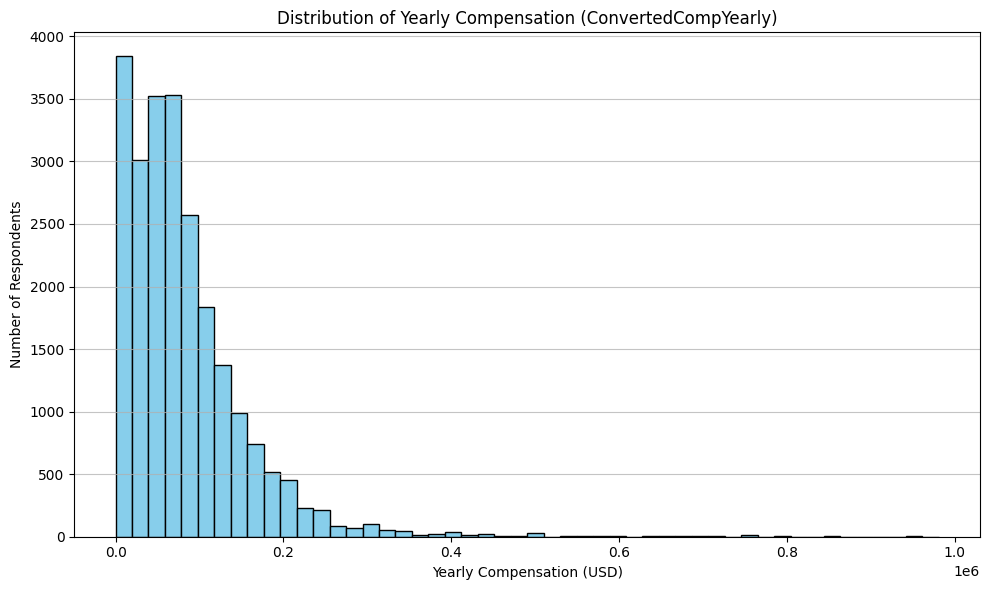

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Clean data: drop rows with missing or zero compensation
df_clean = df.dropna(subset=['ConvertedCompYearly'])
df_clean = df_clean[df_clean['ConvertedCompYearly'] > 0]

# Optional: Remove extreme outliers (e.g., > $1,000,000) for clearer visualization
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 1_000_000]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_clean['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



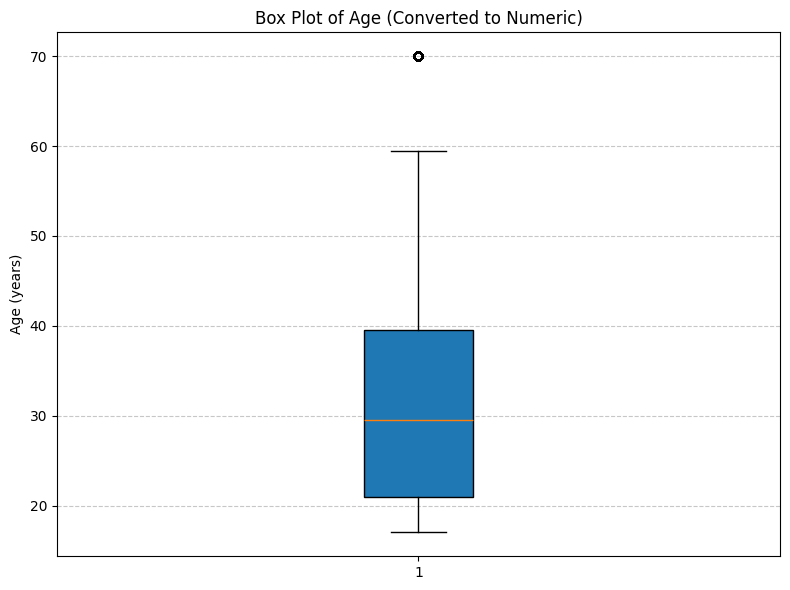

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Map Age categories to approximate numeric values (midpoints)
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows with missing AgeNumeric
df_clean = df.dropna(subset=['AgeNumeric'])

# Plot box plot
plt.figure(figsize=(8,6))
plt.boxplot(df_clean['AgeNumeric'], vert=True, patch_artist=True)
plt.title('Box Plot of Age (Converted to Numeric)')
plt.ylabel('Age (years)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



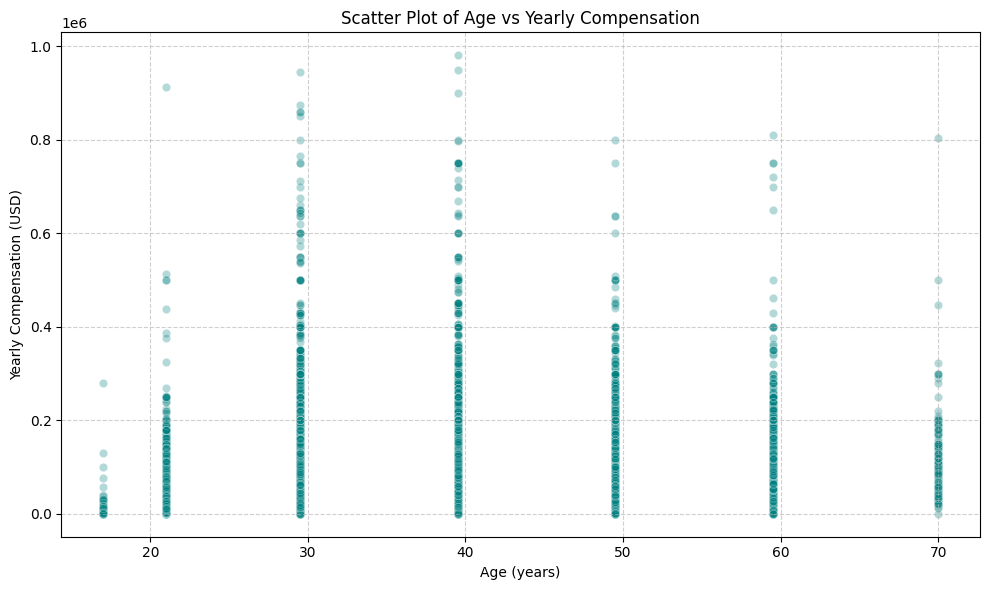

In [6]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Map Age categories to numeric midpoints
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Clean data: drop missing values for AgeNumeric and ConvertedCompYearly, and remove zero/negative compensation
df_clean = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly'])
df_clean = df_clean[df_clean['ConvertedCompYearly'] > 0]

# Optional: filter out extreme compensation outliers for clarity
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 1_000_000]

# Plot scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_clean['AgeNumeric'], df_clean['ConvertedCompYearly'], alpha=0.3, color='teal', edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Age vs Yearly Compensation')
plt.xlabel('Age (years)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


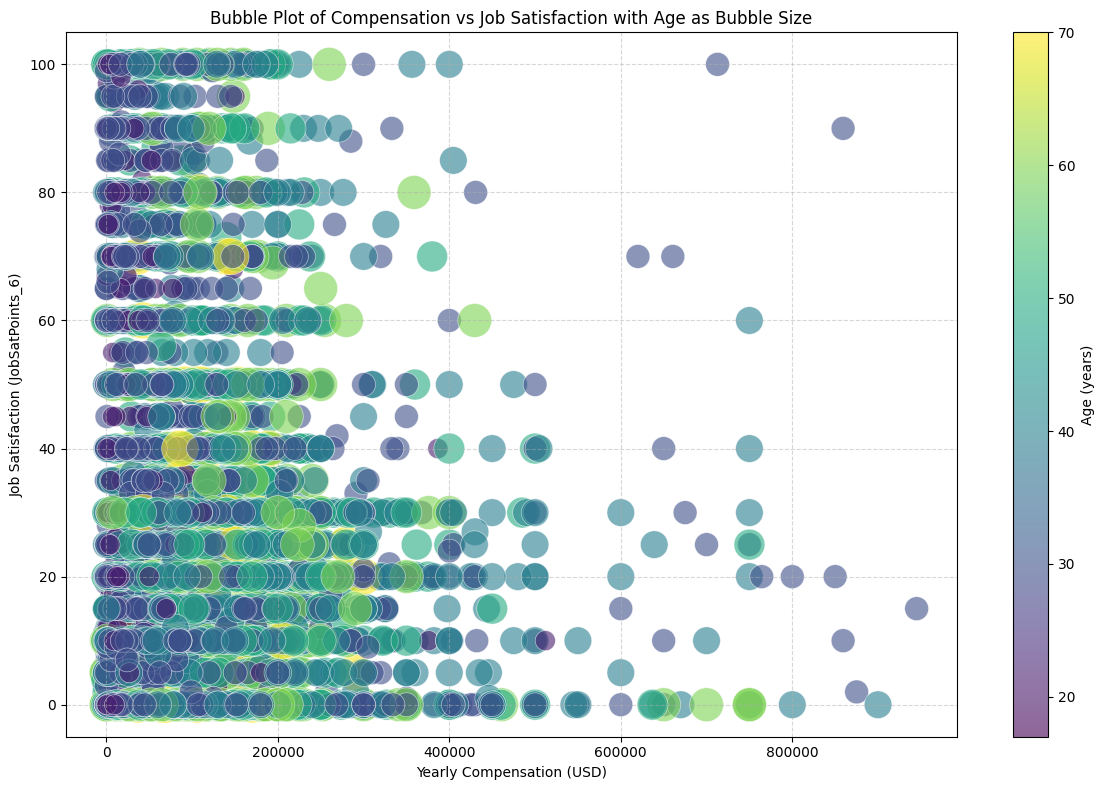

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("survey-data.csv")

# Map Age categories to numeric midpoints
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Clean data: drop rows with missing values in AgeNumeric, ConvertedCompYearly, and JobSatPoints_6
df_clean = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Remove zero or negative compensation and unrealistic high compensation (outliers)
df_clean = df_clean[(df_clean['ConvertedCompYearly'] > 0) & (df_clean['ConvertedCompYearly'] < 1_000_000)]

# Optional: remove unrealistic job satisfaction scores outside 0-100 range
df_clean = df_clean[(df_clean['JobSatPoints_6'] >= 0) & (df_clean['JobSatPoints_6'] <= 100)]

# Plot bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df_clean['ConvertedCompYearly'],
    y=df_clean['JobSatPoints_6'],
    s=df_clean['AgeNumeric']*10,  # Bubble size scaled by age
    c=df_clean['AgeNumeric'],      # Color by age
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(scatter, label='Age (years)')
plt.title('Bubble Plot of Compensation vs Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



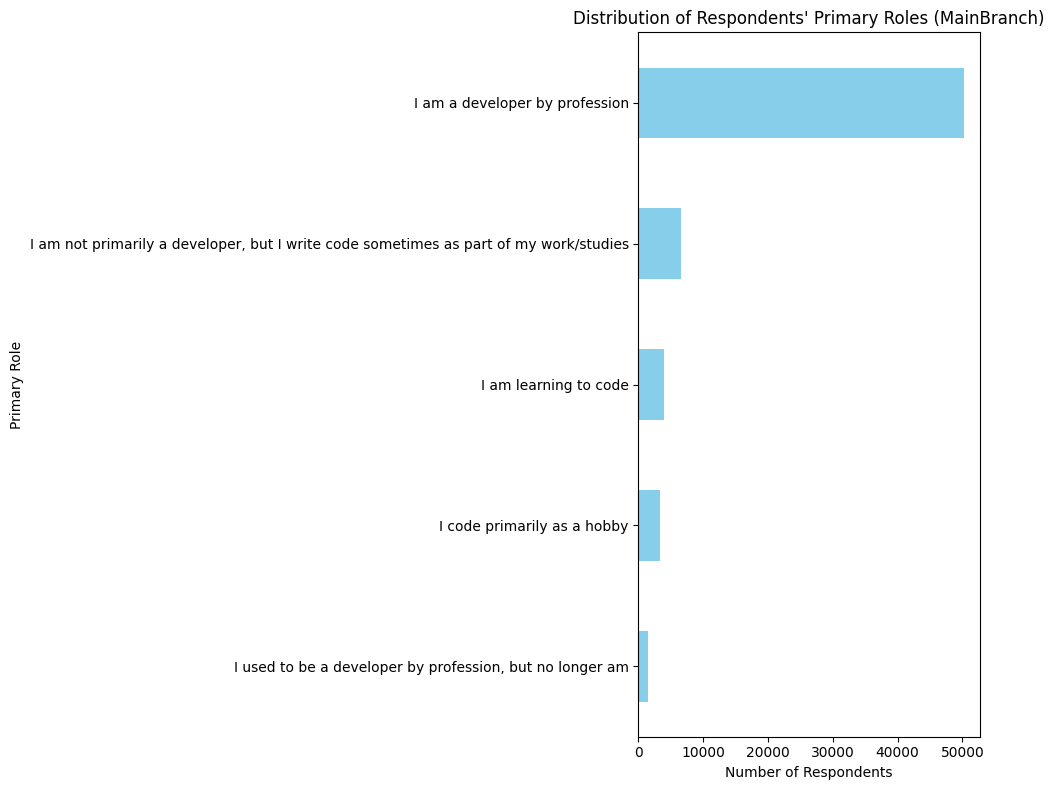

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("survey-data.csv")

# Clean data: drop rows with missing or empty MainBranch values
df_clean = df[df['MainBranch'].notna() & (df['MainBranch'].str.strip() != '')]

# Count frequency of each primary role
role_counts = df_clean['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
role_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Respondents\' Primary Roles (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



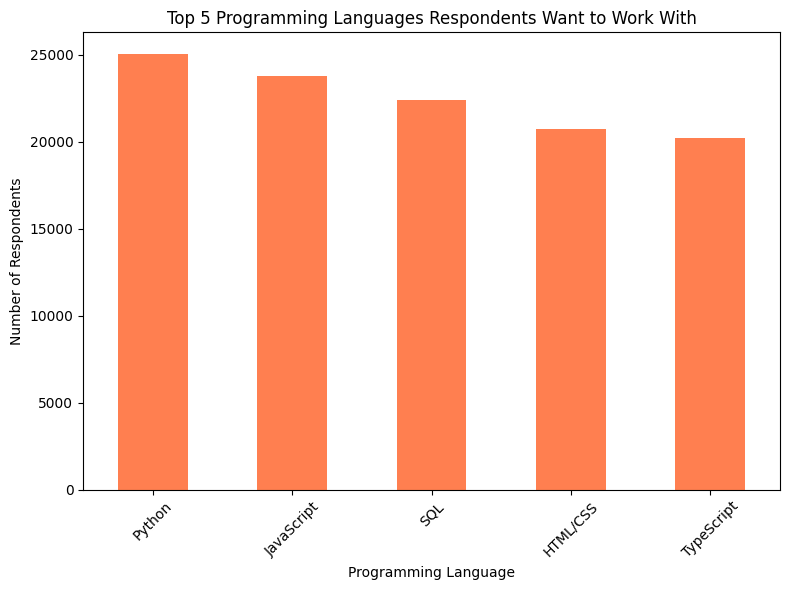

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Drop rows with missing LanguageWantToWorkWith
df_clean = df.dropna(subset=['LanguageWantToWorkWith'])

# Split the semicolon-separated strings into a list
languages_series = df_clean['LanguageWantToWorkWith'].str.split(';').explode()

# Count frequency of each language
language_counts = languages_series.value_counts()

# Select top 5 languages
top5_languages = language_counts.head(5)

# Plot vertical bar chart
plt.figure(figsize=(8,6))
top5_languages.plot(kind='bar', color='coral')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


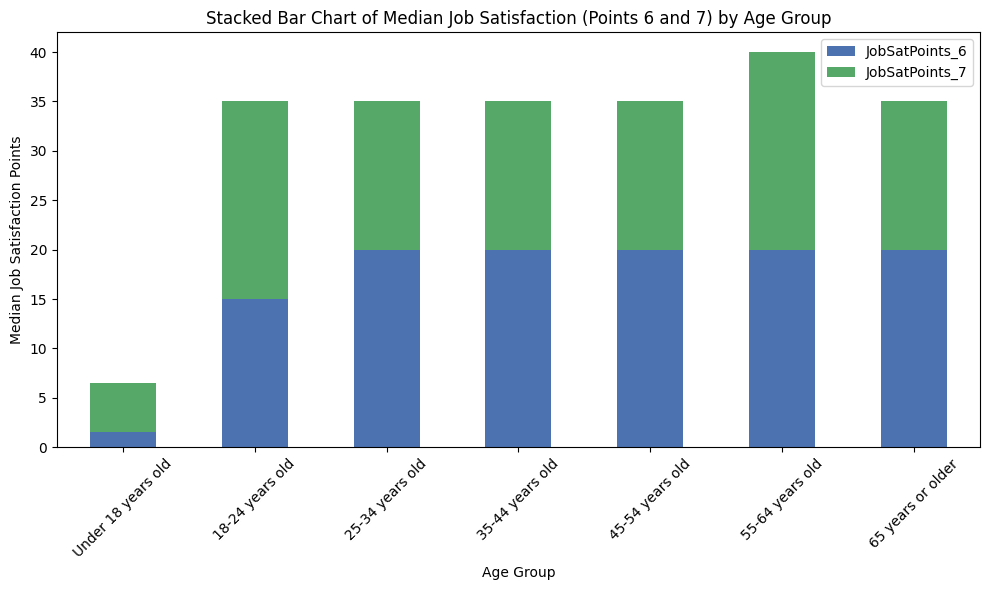

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Clean Age column: remove missing, 'Prefer not to say' and keep consistent order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(age_order)]

# Drop rows with missing JobSatPoints_6 or JobSatPoints_7
df_clean = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and calculate median for both satisfaction columns
median_satisfaction = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reindex(age_order)

# Plot stacked bar chart
ax = median_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#55a868'])

plt.title('Stacked Bar Chart of Median Job Satisfaction (Points 6 and 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



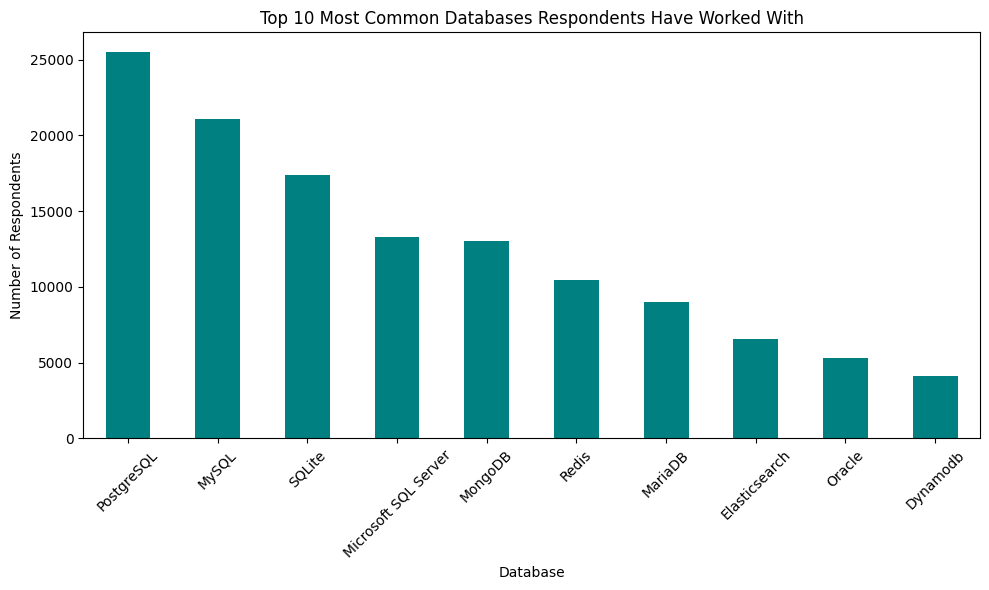

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Drop rows with missing DatabaseHaveWorkedWith
df_clean = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Split the semicolon-separated string into individual databases and explode to separate rows
databases_series = df_clean['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count the frequency of each database
database_counts = databases_series.value_counts()

# Optional: take top 10 most common databases
top_databases = database_counts.head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
top_databases.plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



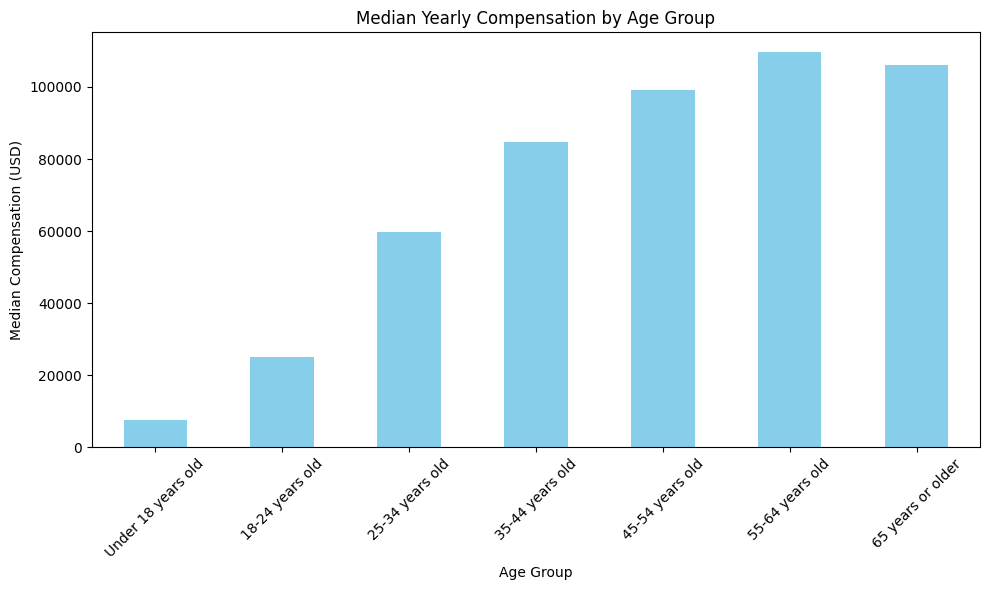

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Define and filter for relevant age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(age_order)]

# Drop missing compensation data
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Calculate median compensation by age group
median_comp_by_age = df_clean.groupby('Age')['ConvertedCompYearly'].median().reindex(age_order)

# Plot bar chart
plt.figure(figsize=(10,6))
median_comp_by_age.plot(kind='bar', color='skyblue')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



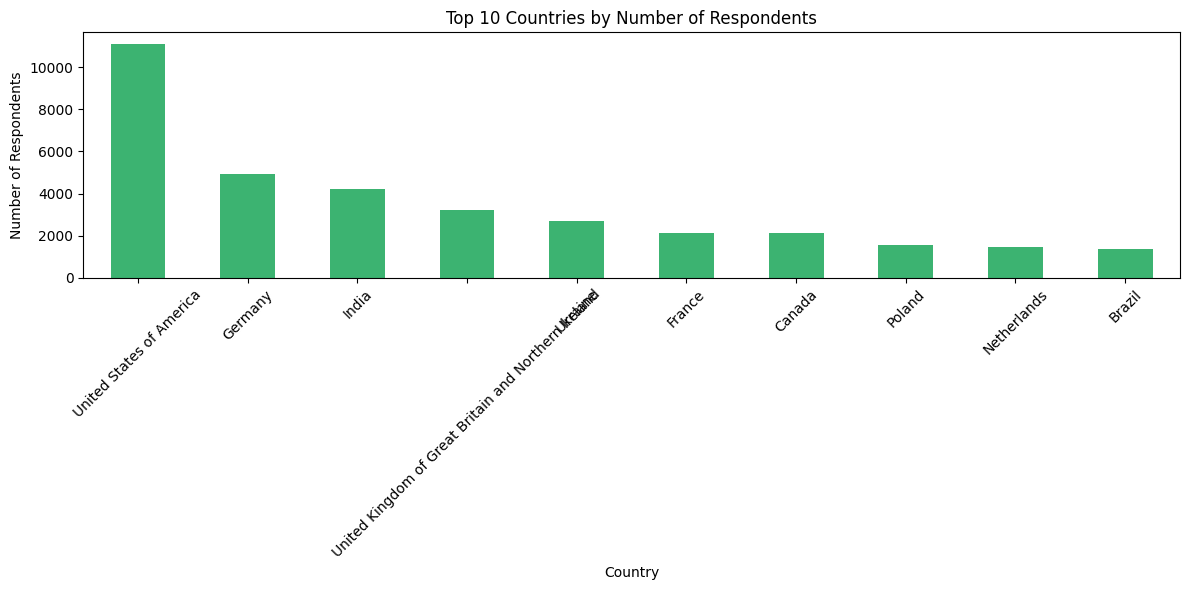

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Drop missing values in the 'Country' column
df_clean = df.dropna(subset=['Country'])

# Count respondents by country
country_counts = df_clean['Country'].value_counts()

# Optionally, select top 10 countries
top_countries = country_counts.head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Countries by Number of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
